In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
afcars_2018  = pd.read_csv("../data/AFCARS2000-2021/DATA2018.CSV")
afcars_2019  = pd.read_csv("../data/AFCARS2000-2021/DATA2019.CSV")
afcars_2020  = pd.read_csv("../data/AFCARS2000-2021/DATA2020.CSV")


/var/folders/lm/7_plm4ms6cs6cr_8jq14txpc0000gn/T/ipykernel_13586/2075307714.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  afcars_2018  = pd.read_csv("../data/AFCARS2000-2021/DATA2018.CSV")


STATE FILTERING

In [6]:
afcars_2018_ma = afcars_2018[afcars_2018['St']=='MA']
afcars_2019_ma = afcars_2019[afcars_2019['St']=='MA']
afcars_2020_ma = afcars_2020[afcars_2020['St']=='MA']


In [17]:
afcars_2018_ma_total_records = afcars_2018_ma['RecNumbr'].count()
afcars_2019_ma_total_records = afcars_2019_ma['RecNumbr'].count()
afcars_2020_ma_total_records = afcars_2020_ma['RecNumbr'].count()

print("2018" , afcars_2018_ma_total_records)
print("2019" , afcars_2019_ma_total_records)
print("2020" , afcars_2020_ma_total_records)

2018 16457
2019 15802
2020 14289


In [26]:
def percentage_decrease_cal(prev, next):
    return (prev - next)*100/prev 

In [28]:
print("2018","2019", percentage_decrease_cal(afcars_2018_ma_total_records,afcars_2019_ma_total_records))
print("2019","2020", percentage_decrease_cal(afcars_2019_ma_total_records,afcars_2020_ma_total_records))
print("2018","2020", percentage_decrease_cal(afcars_2018_ma_total_records,afcars_2020_ma_total_records))


2018 2019 3.980069271434648
2019 2020 9.57473737501582
2018 2020 13.173725466366896


In [46]:
years = ["2018","2019","2020"]

CONDITION

In [30]:
condition = ['ClinDis', 'MR', 'VisHear', 'PhyDis','EmotDist', 'OtherMed']

In [29]:
afcars_2018_ma.columns

Index(['FY', 'Version', 'State', 'St', 'RepDatYr', 'RepDatMo', 'FIPSCode',
       'RecNumbr', 'Sex', 'AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin', 'ClinDis', 'MR', 'VisHear', 'PhyDis',
       'EmotDist', 'OtherMed', 'EverAdpt', 'AgeAdopt', 'TotalRem', 'NumPlep',
       'ManRem', 'PhyAbuse', 'SexAbuse', 'Neglect'],
      dtype='object')

In [37]:
afcars_2018_ma['RecNumbr']

afcars_2018_ma.groupby('ClinDis')['RecNumbr'].apply(lambda x: (x==1).sum()).reset_index(name='count')

,ClinDis,count
0,1.0,0
1,2.0,0
2,3.0,0


In [44]:
afcars_2020_ma[afcars_2020_ma['ClinDis'] == 1].count()[1]

2925

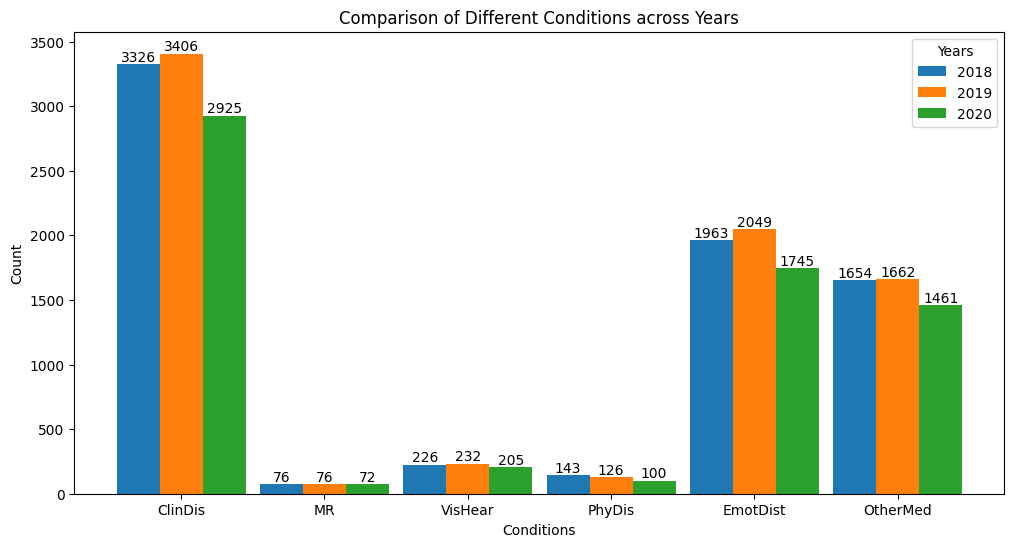

In [83]:
condition = ['ClinDis', 'MR', 'VisHear', 'PhyDis','EmotDist', 'OtherMed']
yearly_data = {}
for i in condition:
    info = []
    info.append(afcars_2018_ma[afcars_2018_ma[i] == 1].count()[1])
    info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
    info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data.update({i:info})

import numpy as np
import matplotlib.pyplot as plt

# Data for three years and different categories
years = [2018, 2019, 2020]

categories = condition

sales_data = yearly_data

# Set the width of each bar
bar_width = 0.3

# Calculate the position of each bar on the x-axis
bar_positions = np.arange(len(categories))

# Plotting the data
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Iterate over each year
for i, year in enumerate(years):
    # Calculate the offset for each bar within a year
    offset = i * bar_width

    # Plot the bars for each category
    plt1 = plt.bar(bar_positions + offset, [sales_data[category][i] for category in categories],
            width=bar_width, label=str(year))
    plt.bar_label(plt1)
    

# Adding labels and title
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.title('Comparison of Different Conditions across Years')

# Adjust the x-axis tick positions and labels
plt.xticks(bar_positions + bar_width, categories)

# Adding legend
plt.legend(title='Years')

# Displaying the plot
plt.show()


RACE

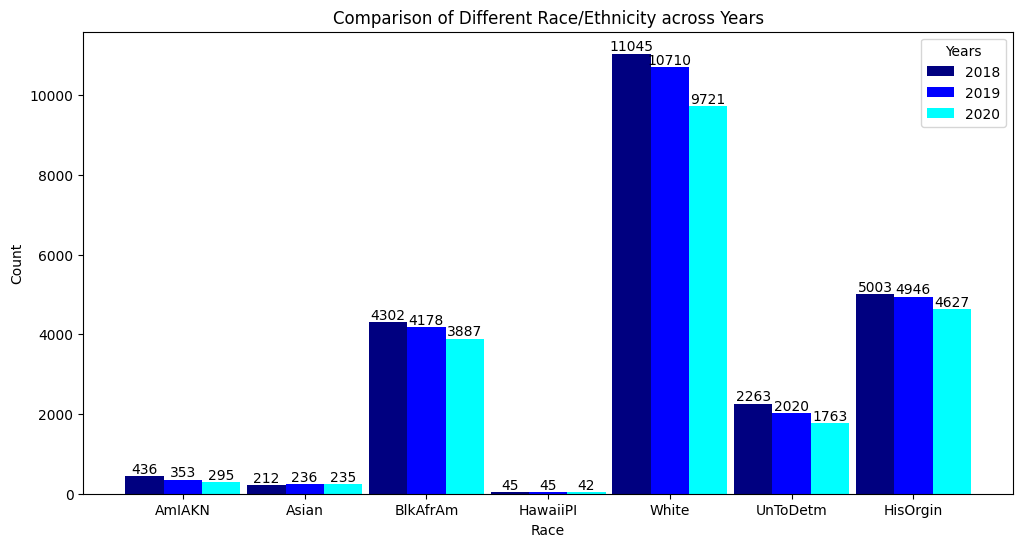

In [84]:
yearly_data = {}
race = ['AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin']
for i in race:
    info = []
    info.append(afcars_2018_ma[afcars_2018_ma[i] == 1].count()[1])
    info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
    info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data.update({i:info})


import numpy as np
import matplotlib.pyplot as plt

# Data for three years and different categories
years = [2018, 2019, 2020]
color = ["navy","blue","cyan"]
categories = ['Category A', 'Category B', 'Category C']

categories = race

sales_data = yearly_data

# Set the width of each bar
bar_width = 0.315

# Calculate the position of each bar on the x-axis
bar_positions = np.arange(len(categories))

# Plotting the data
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Iterate over each year
for i, year in enumerate(years):
    # Calculate the offset for each bar within a year
    offset = i * bar_width

    # Plot the bars for each category
    plt1 = plt.bar(bar_positions + offset, [sales_data[category][i] for category in categories],
            width=bar_width, label=str(year) , color = color[i])
    plt.bar_label(plt1)
    

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Comparison of Different Race/Ethnicity across Years')

# Adjust the x-axis tick positions and labels
plt.xticks(bar_positions + bar_width, categories)

# Adding legend
plt.legend(title='Years')

# Displaying the plot
plt.show()


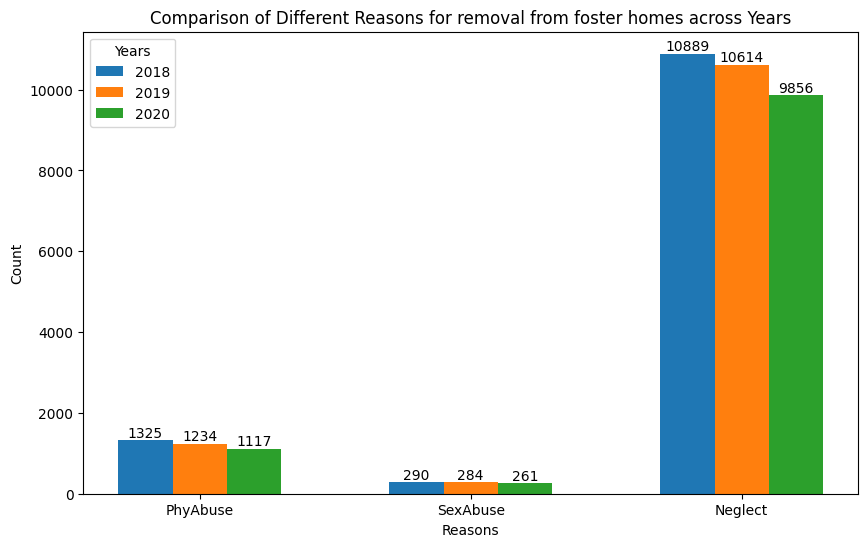

In [81]:
reason_for_removal = ['PhyAbuse', 'SexAbuse', 'Neglect']
yearly_data = {}
for i in reason_for_removal:
    info = []
    info.append(afcars_2018_ma[afcars_2018_ma[i] == 1].count()[1])
    info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
    info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data.update({i:info})

import numpy as np
import matplotlib.pyplot as plt

# Data for three years and different categories
years = [2018, 2019, 2020]

categories = reason_for_removal

sales_data = yearly_data

# Set the width of each bar
bar_width = 0.2

# Calculate the position of each bar on the x-axis
bar_positions = np.arange(len(categories))

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Iterate over each year
for i, year in enumerate(years):
    # Calculate the offset for each bar within a year
    offset = i * bar_width

    # Plot the bars for each category
    plt1 = plt.bar(bar_positions + offset, [sales_data[category][i] for category in categories],
            width=bar_width, label=str(year))
    plt.bar_label(plt1)
    

# Adding labels and title
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.title('Comparison of Different Reasons for removal from foster homes across Years')

# Adjust the x-axis tick positions and labels
plt.xticks(bar_positions + bar_width, categories)

# Adding legend
plt.legend(title='Years')

# Displaying the plot
plt.show()



In [87]:
afcars_2018_ma.columns

Index(['FY', 'Version', 'State', 'St', 'RepDatYr', 'RepDatMo', 'FIPSCode',
       'RecNumbr', 'Sex', 'AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin', 'ClinDis', 'MR', 'VisHear', 'PhyDis',
       'EmotDist', 'OtherMed', 'EverAdpt', 'AgeAdopt', 'TotalRem', 'NumPlep',
       'ManRem', 'PhyAbuse', 'SexAbuse', 'Neglect'],
      dtype='object')

In [91]:
reason_for_removal = ['PhyAbuse', 'SexAbuse', 'Neglect']
race = ['AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin']

yearly_data = {}
for j in race:
    info = []
    for i in reason_for_removal:
        
        info.append(afcars_2018_ma[(afcars_2018_ma[i] == 1) & (afcars_2018_ma[j] == 1)].count()[1])
        # info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
        # info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data.update({j:info})

yearly_data

{'AmIAKN': [27, 14, 335],
 'Asian': [37, 6, 130],
 'BlkAfrAm': [440, 63, 2837],
 'HawaiiPI': [0, 0, 36],
 'White': [746, 171, 7428],
 'UnToDetm': [221, 64, 1436],
 'HisOrgin': [531, 136, 3300]}

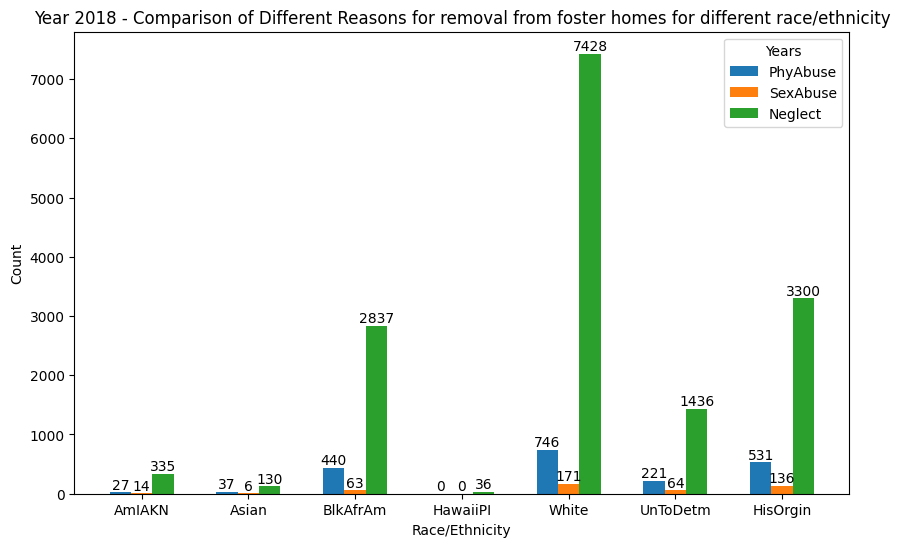

In [127]:
reason_for_removal = ['PhyAbuse', 'SexAbuse', 'Neglect']
race = ['AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin']

yearly_data_2018 = {}
for j in race:
    info = []
    for i in reason_for_removal:
        info.append(afcars_2018_ma[(afcars_2018_ma[i] == 1) & (afcars_2018_ma[j] == 1)].count()[1])
        # info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
        # info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data_2018.update({j:info})

import numpy as np
import matplotlib.pyplot as plt

# Data for three years and different categories
years = [2018, 2019, 2020]
years = reason_for_removal

categories = race

sales_data = yearly_data_2018

# Set the width of each bar
bar_width = 0.2

# Calculate the position of each bar on the x-axis
bar_positions = np.arange(len(categories))

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Iterate over each year
for i, year in enumerate(years):
    # Calculate the offset for each bar within a year
    offset = i * bar_width

    # Plot the bars for each category
    plt1 = plt.bar(bar_positions + offset, [sales_data[category][i] for category in categories],
            width=bar_width, label=str(year))
    plt.bar_label(plt1)
    

# Adding labels and title
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Year 2018 - Comparison of Different Reasons for removal from foster homes for different race/ethnicity')

# Adjust the x-axis tick positions and labels
plt.xticks(bar_positions + bar_width, categories)

# Adding legend
plt.legend(title='Years')

# Displaying the plot
plt.show()



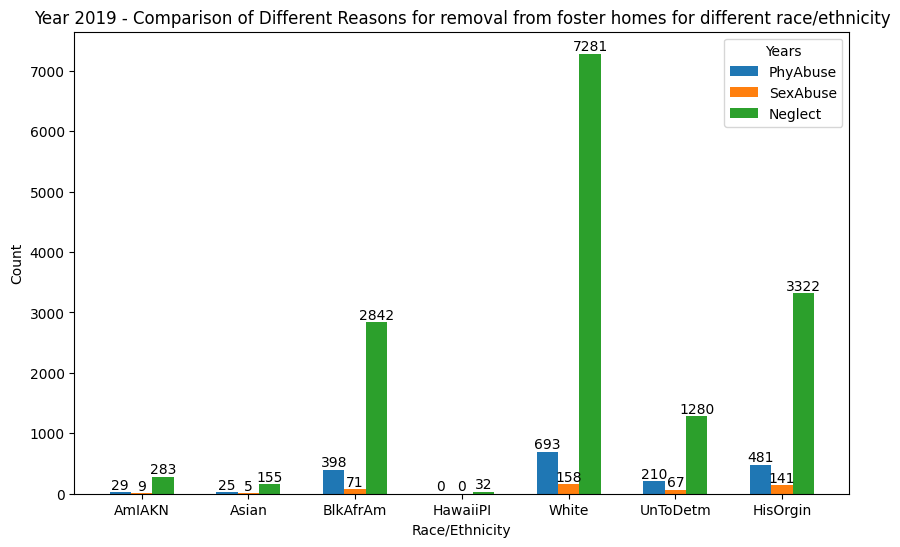

In [130]:
reason_for_removal = ['PhyAbuse', 'SexAbuse', 'Neglect']
race = ['AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin']

yearly_data_2019 = {}
for j in race:
    info = []
    for i in reason_for_removal:
        info.append(afcars_2019_ma[(afcars_2019_ma[i] == 1) & (afcars_2019_ma[j] == 1)].count()[1])
        # info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
        # info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data_2019.update({j:info})

import numpy as np
import matplotlib.pyplot as plt

# Data for three years and different categories
years = [2018, 2019, 2020]
years = reason_for_removal

categories = race

sales_data = yearly_data_2019

# Set the width of each bar
bar_width = 0.2

# Calculate the position of each bar on the x-axis
bar_positions = np.arange(len(categories))

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Iterate over each year
for i, year in enumerate(years):
    # Calculate the offset for each bar within a year
    offset = i * bar_width

    # Plot the bars for each category
    plt1 = plt.bar(bar_positions + offset, [sales_data[category][i] for category in categories],
            width=bar_width, label=str(year))
    plt.bar_label(plt1)
    

# Adding labels and title
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Year 2019 - Comparison of Different Reasons for removal from foster homes for different race/ethnicity')

# Adjust the x-axis tick positions and labels
plt.xticks(bar_positions + bar_width, categories)

# Adding legend
plt.legend(title='Years')

# Displaying the plot
plt.show()



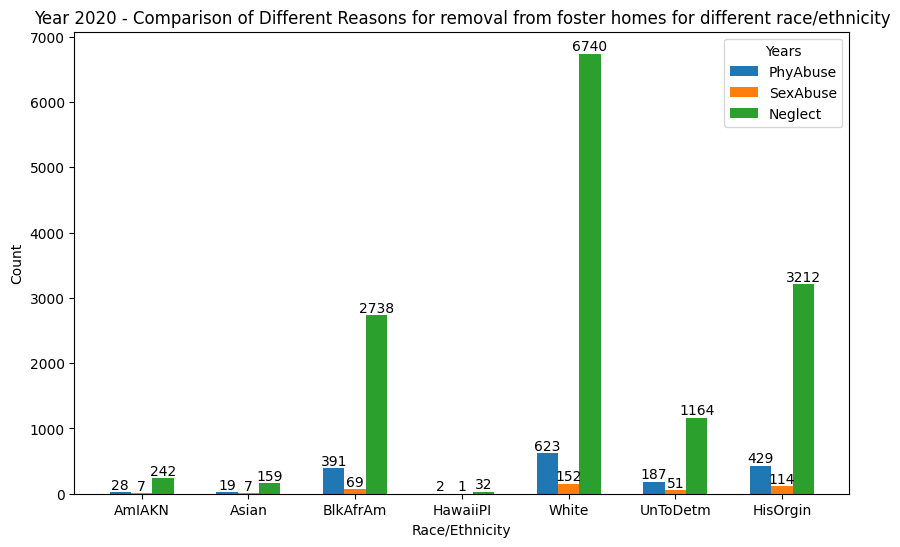

In [129]:
reason_for_removal = ['PhyAbuse', 'SexAbuse', 'Neglect']
race = ['AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin']

yearly_data_2020 = {}
for j in race:
    info = []
    for i in reason_for_removal:
        info.append(afcars_2020_ma[(afcars_2020_ma[i] == 1) & (afcars_2020_ma[j] == 1)].count()[1])
        # info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
        # info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data_2020.update({j:info})

import numpy as np
import matplotlib.pyplot as plt

# Data for three years and different categories
years = [2018, 2019, 2020]
years = reason_for_removal

categories = race

sales_data = yearly_data_2020

# Set the width of each bar
bar_width = 0.2

# Calculate the position of each bar on the x-axis
bar_positions = np.arange(len(categories))

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Iterate over each year
for i, year in enumerate(years):
    # Calculate the offset for each bar within a year
    offset = i * bar_width

    # Plot the bars for each category
    plt1 = plt.bar(bar_positions + offset, [sales_data[category][i] for category in categories],
            width=bar_width, label=str(year))
    plt.bar_label(plt1)
    

# Adding labels and title
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Year 2020 - Comparison of Different Reasons for removal from foster homes for different race/ethnicity')

# Adjust the x-axis tick positions and labels
plt.xticks(bar_positions + bar_width, categories)

# Adding legend
plt.legend(title='Years')

# Displaying the plot
plt.show()



In [131]:
print(yearly_data_2018)
print(yearly_data_2019)
print(yearly_data_2020)

{'AmIAKN': [27, 14, 335], 'Asian': [37, 6, 130], 'BlkAfrAm': [440, 63, 2837], 'HawaiiPI': [0, 0, 36], 'White': [746, 171, 7428], 'UnToDetm': [221, 64, 1436], 'HisOrgin': [531, 136, 3300]}
{'AmIAKN': [29, 9, 283], 'Asian': [25, 5, 155], 'BlkAfrAm': [398, 71, 2842], 'HawaiiPI': [0, 0, 32], 'White': [693, 158, 7281], 'UnToDetm': [210, 67, 1280], 'HisOrgin': [481, 141, 3322]}
{'AmIAKN': [28, 7, 242], 'Asian': [19, 7, 159], 'BlkAfrAm': [391, 69, 2738], 'HawaiiPI': [2, 1, 32], 'White': [623, 152, 6740], 'UnToDetm': [187, 51, 1164], 'HisOrgin': [429, 114, 3212]}


In [134]:
print("White 2018-2019",percentage_decrease_cal(7428,7281))
print("White 2019-2020",percentage_decrease_cal(7281,6740))
print("White 2018-2020",percentage_decrease_cal(7428,6740))


print("Hispanic 2018-2019",percentage_decrease_cal(3300,3322))
print("Hispanic 2019-2020",percentage_decrease_cal(3322,3212))
print("Hispanic 2018-2020",percentage_decrease_cal(3300,3212))

print("Black 2018-2019",percentage_decrease_cal(2837,2842))
print("Black 2019-2020",percentage_decrease_cal(2842,2738))
print("Black 2018-2020",percentage_decrease_cal(2837,2738))



White 2018-2019 1.9789983844911148
White 2019-2020 7.430298035984068
White 2018-2020 9.262250942380183
Hispanic 2018-2019 -0.6666666666666666
Hispanic 2019-2020 3.3112582781456954
Hispanic 2018-2020 2.6666666666666665
Black 2018-2019 -0.17624250969333805
Black 2019-2020 3.6593947923997185
Black 2018-2020 3.489601691928093


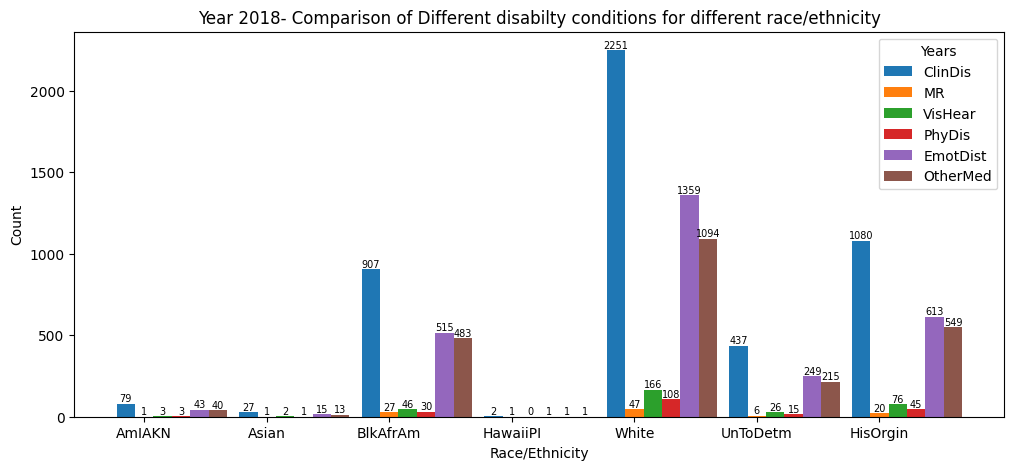

In [124]:
condition = ['ClinDis', 'MR', 'VisHear', 'PhyDis','EmotDist', 'OtherMed']
race = ['AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin']

yearly_data = {}
for j in race:
    info = []
    for i in condition:
        info.append(afcars_2018_ma[(afcars_2018_ma[i] == 1) & (afcars_2018_ma[j] == 1)].count()[1])
        # info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
        # info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data.update({j:info})

import numpy as np
import matplotlib.pyplot as plt

# Data for three years and different categories
years = [2018, 2019, 2020]
years = condition

categories = race

sales_data = yearly_data

# Set the width of each bar
bar_width = 0.15

# Calculate the position of each bar on the x-axis
bar_positions = np.arange(len(categories))

# Plotting the data
plt.figure(figsize=(12, 5))  # Set the size of the figure

# Iterate over each year
for i, year in enumerate(years):
    # Calculate the offset for each bar within a year
    offset = i * bar_width

    # Plot the bars for each category
    plt1 = plt.bar(bar_positions + offset, [sales_data[category][i] for category in categories],
            width=bar_width, label=str(year))
    plt.bar_label(plt1,fontsize=7)
    

# Adding labels and title
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Year 2018- Comparison of Different disabilty conditions for different race/ethnicity')

# Adjust the x-axis tick positions and labels
plt.xticks(bar_positions + bar_width, categories)

# Adding legend
plt.legend(title='Years')

# Displaying the plot
plt.show()



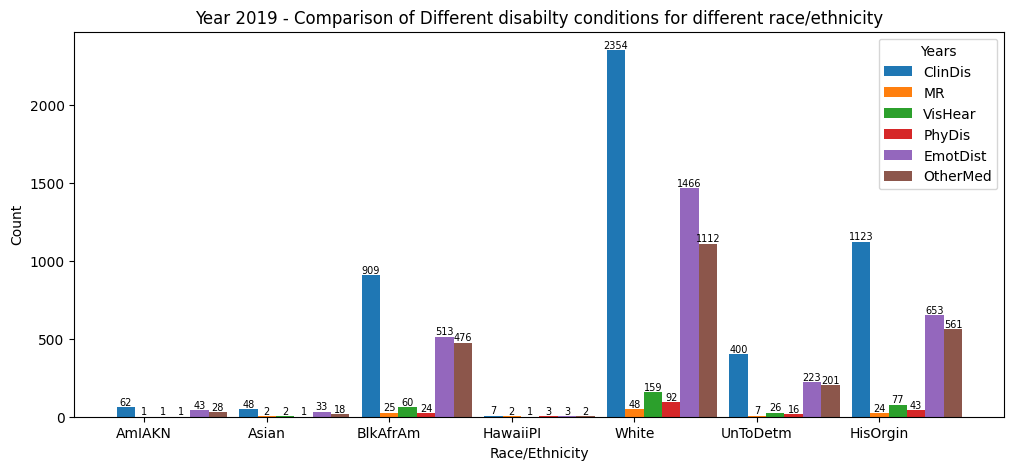

In [125]:
condition = ['ClinDis', 'MR', 'VisHear', 'PhyDis','EmotDist', 'OtherMed']
race = ['AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin']

yearly_data = {}
for j in race:
    info = []
    for i in condition:
        info.append(afcars_2019_ma[(afcars_2019_ma[i] == 1) & (afcars_2019_ma[j] == 1)].count()[1])
        # info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
        # info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data.update({j:info})

import numpy as np
import matplotlib.pyplot as plt

# Data for three years and different categories
years = [2018, 2019, 2020]
years = condition

categories = race

sales_data = yearly_data

# Set the width of each bar
bar_width = 0.15

# Calculate the position of each bar on the x-axis
bar_positions = np.arange(len(categories))

# Plotting the data
plt.figure(figsize=(12, 5))  # Set the size of the figure

# Iterate over each year
for i, year in enumerate(years):
    # Calculate the offset for each bar within a year
    offset = i * bar_width

    # Plot the bars for each category
    plt1 = plt.bar(bar_positions + offset, [sales_data[category][i] for category in categories],
            width=bar_width, label=str(year))
    plt.bar_label(plt1,fontsize=7)
    

# Adding labels and title
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Year 2019 - Comparison of Different disabilty conditions for different race/ethnicity')

# Adjust the x-axis tick positions and labels
plt.xticks(bar_positions + bar_width, categories)

# Adding legend
plt.legend(title='Years')

# Displaying the plot
plt.show()



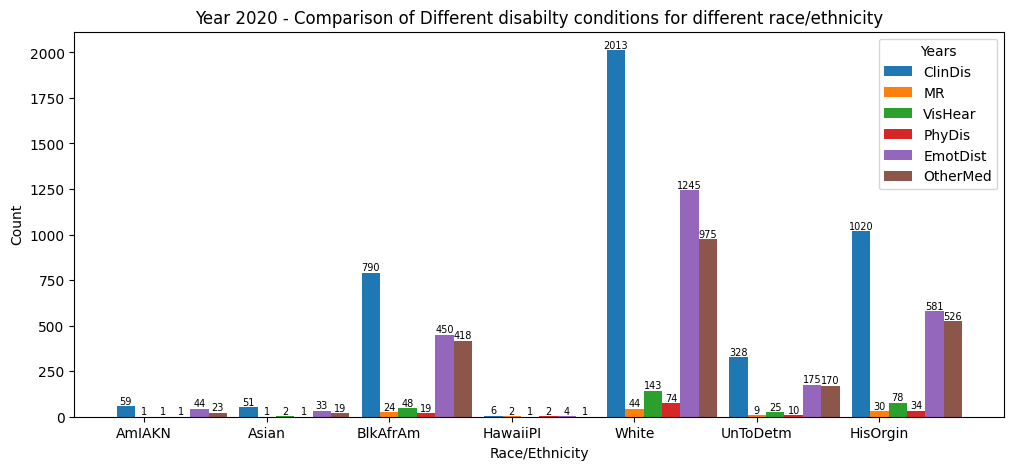

In [126]:
condition = ['ClinDis', 'MR', 'VisHear', 'PhyDis','EmotDist', 'OtherMed']
race = ['AmIAKN', 'Asian', 'BlkAfrAm', 'HawaiiPI', 'White',
       'UnToDetm', 'HisOrgin']

yearly_data = {}
for j in race:
    info = []
    for i in condition:
        info.append(afcars_2020_ma[(afcars_2020_ma[i] == 1) & (afcars_2020_ma[j] == 1)].count()[1])
        # info.append(afcars_2019_ma[afcars_2019_ma[i] == 1].count()[1])
        # info.append(afcars_2020_ma[afcars_2020_ma[i] == 1].count()[1])
    yearly_data.update({j:info})

import numpy as np
import matplotlib.pyplot as plt

# Data for three years and different categories
years = [2018, 2019, 2020]
years = condition

categories = race

sales_data = yearly_data

# Set the width of each bar
bar_width = 0.15

# Calculate the position of each bar on the x-axis
bar_positions = np.arange(len(categories))

# Plotting the data
plt.figure(figsize=(12, 5))  # Set the size of the figure

# Iterate over each year
for i, year in enumerate(years):
    # Calculate the offset for each bar within a year
    offset = i * bar_width

    # Plot the bars for each category
    plt1 = plt.bar(bar_positions + offset, [sales_data[category][i] for category in categories],
            width=bar_width, label=str(year))
    plt.bar_label(plt1,fontsize=7)
    

# Adding labels and title
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Year 2020 - Comparison of Different disabilty conditions for different race/ethnicity')

# Adjust the x-axis tick positions and labels
plt.xticks(bar_positions + bar_width, categories)

# Adding legend
plt.legend(title='Years')

# Displaying the plot
plt.show()



In [138]:
afcars_2018_ma['AgeAdopt'].value_counts()

0.0    15433
5.0      645
2.0      177
3.0      159
1.0       38
4.0        5
Name: AgeAdopt, dtype: int64

In [140]:
afcars_2019_ma['AgeAdopt'].value_counts()


0.0    14844
5.0      591
2.0      174
3.0      144
1.0       39
4.0       10
Name: AgeAdopt, dtype: int64

In [139]:
afcars_2020_ma['AgeAdopt'].value_counts()


0.0    13522
5.0      473
2.0      137
3.0      111
1.0       35
4.0       11
Name: AgeAdopt, dtype: int64